In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# Machine Learning

## Binary Classification

The simplest, common and yet very practical problem in machine learning is __binary classification__. What does binary classification mean? Let's see an example. Let's say that you have a lot of images of cats and dogs. When you look at the picture, you know whether it contains a dog or a cat. But you want to teach the computer to recognise them. What you want to achieve is: you give a computer an image as an input. Its output should be: this is a dog, or this is a cat. The binary in binary classification means that computer can only tell you two answers, dog, or a cat, an nothing more.

To achieve this requires two things. You need the __data__. Data is usually represented in vectors. Later we will learn more about vectors, but for now, think of them as ordered list of numbers. So let's say that a picture of a dog or a cat can be encoded in 100 numbers. What else do you need? You need __labels__. A label defines the class associated with your data. In our case, a label could be a dog or a cat. But it is not necessary to think of a label as a string of text. Since we know that we only have two classes, we can say that we will label a picture of a dog with the number 1 and a picture of a cat with the number 0. This should work just as well. 

Let's introduce an example that is easier to implement at this stage. We have a data set below, containing 6 data points, each containing a 2-dimensional vector associated with a label. For example, a vector `[1.2, 0.7]` is associated with the label `+1`.

| vector [x,y] 	| label 	|
|--------------	|-------	|
| [ 1.2, 0.7]  	| +1    	|
| [-0.3, -0.5] 	| -1    	|
| [3.0, 0.1]   	| +1    	|
| [-0.1, -1.0] 	| -1    	|
| [-1.0, 1.1]  	| -1    	|
| [2.1, -3.0]  	| +1    	|

To get a better understanding of the data, we can plot these two-dimensional vectors on a cartesian plane:

<img src="img/neural_networks_33.png" alt="drawing" width="500"/>

Here, the location on the point in the plane is given by the pair of coordinates, and its colour is defined by the label. Red points have the label `+1`, and the blue points have the label `-1`.  When we give the computer a pair of (x,y) coordinates, we want the computer to tell us should whether the point should be marked `-1`—red or `+1`—blue, according to what it knows from the data.  What does learning means in this case? The computer needs to define the boundary between these two given classes. This can be explained in more technical terms:

<font color=blue> Our __goal__ in binary classification is to learn a function that takes an arbitrary 2-dimensional vector and predicts the label according to the provided data. This function is usually parameterized by a certain set of parameters, and we will want to tune the parameters of the function so that its outputs are consistent with the labeling in the provided dataset. In the end we can discard the dataset and use the learned parameters to predict labels for previously unseen vectors. </font>

### Classification by using a simple linear function 

First we will use a simple linear function to implement binary classification:

\begin{align}
F = f(\mathbf{X},\mathbf{Y})=A\mathbf{X}+B\mathbf{Y}+C
\end{align}

Here, $\mathbf{X}$ and $\mathbf{Y}$ are the input vectors, and $A$, $B$ and $C$ are the parameters that we are trying to learn. This can be represented schematically:

<img src="img/neural_networks_16.png" alt="drawing" width="400"/>

So, if our data point is $(\mathbf{X},\mathbf{Y})=$ `[1.2,0.7]`, and if the chosen parameters are $A=$ `1`, $B=$ `-2`, $C=$ `-3`.

In [2]:
X, Y, A, B, C = 1.2, 0.7, 1, -2, -3

then the output of the function $F = f(\mathbf{X},\mathbf{Y})$ is:

In [3]:
A*X + B*Y + C

-3.2

<img src="img/neural_networks_17.png" alt="drawing" width="400"/>

How can we use this setup to predict the label (`+1`, or `-1`) of an arbitrary vector, for example `[-2.1, 0.8]`, given only our data set?

| vector [x,y] 	| label 	|
|--------------	|-------	|
| [ 1.2, 0.7]  	| +1    	|
| [-0.3, -0.5] 	| -1    	|
| [3.0, 0.1]   	| +1    	|
| [-0.1, -1.0] 	| -1    	|
| [-1.0, 1.1]  	| -1    	|
| [2.1, -3.0]  	| +1    	|

<img src="img/neural_networks_33.png" alt="drawing" width="500"/>

The prediction has to do with how do we interpret the output $F$ of the function $f(\mathbf{X},\mathbf{Y})$.<br>

__We can define that in our algorithm, the parameters $A$, $B$, and $C$ must be tuned such that the function $f$ outputs a number greater than 0 when it encounters a data point associated with the label `+1`. In the same way, the function should output a number less (or equal to) than 0 when it encounters a data point associated with the label `-1`.__

For example, when we plugged the vector $(\mathbf{X},\mathbf{Y})=$ `[1.2,0.7]` associated with the label `+1` into the function $f$ whose current parameters are <br> $[A,B,C]=$ `1, -2, -3` we got the result $F = -3.2$.<br>
Since the label associated with this vector is `+1`, we want our function to output a number larger than 0. Instead we got `-3.2` which is less than 0. This tells us what needs to be done. We need to tweak the parameters `A`, `B` and `C` such that we *maximize* the ouput of the function—push it towards a positive number. Luckily we know how to do this with derivatives!


#### Backpropagation

In order to increase the output of the function $f$ we need to find the partial derivatives $\frac{\partial F}{\partial A}$, $\frac{\partial F}{\partial B}$ and $\frac{\partial F}{\partial C}$. Note that we don't need to find the partials $\frac{\partial F}{\partial \mathbf{X}}$, and $\frac{\partial F}{\partial \mathbf{Y}}$ as these are our data points. They don't need to change!

<img src="img/neural_networks_16.png" alt="drawing" width="400"/>

By using the chain rule, rules of differentiation and consulting the diagram above we can compute:

\begin{align*}
\frac{\partial F}{\partial A} &=\frac{\partial F}{\partial G}*\frac{\partial G}{\partial A}; &\frac{\partial F}{\partial B} &=\frac{\partial F}{\partial G}*\frac{\partial G}{\partial B}; &\frac{\partial F}{\partial C} ;& \\\\
\frac{\partial F}{\partial A} &=1*X &\frac{\partial F}{\partial B} &=1*Y &\frac{\partial F}{\partial C} &=1 \\\\
\frac{\partial F}{\partial A} &=X &\frac{\partial F}{\partial B} &=Y &\frac{\partial F}{\partial C} &=1
\end{align*}

Since in this case we want to maximize our function we could translate this computation in code by simply writing `dA = X; dB = Y; dC = 1` and this would work. However, in some cases we will need to minimize our function. For that purpose it is useful to multiply `dA`, `dB` and `dC` with either `-1` or `+1` depending on the given situation. For that we can introduce a new variable `pull` that can be set to  `1` or `-1`:

In [4]:
pull = 1 # since here we want to maximize the function

dA = X * pull
dB = Y * pull
dC = 1 * pull
print (f'dF/dA: {dA}\ndF/dB: {dB}\ndF/dC: {dC}')

dF/dA: 1.2
dF/dB: 0.7
dF/dC: 1


<img src="img/neural_networks_18.png" alt="drawing" width="400"/>

In order to gradually maximize the function $f$ (step-by-step) towards our desired result, we need to update our parameters. This is done by adding to the parameter's value the value of its partial derivative. To achieve this gradually in small steps, we multiply the value of the partial derivative by a a small number (step).

In [5]:
step_size = 0.01
A = A + dA * step_size
B = B + dB * step_size
C = C + dC * step_size

If we now evaluate the function $f(\mathbf{X},\mathbf{Y})$, with the updated parameters $A$, $B$, and $C$, we get:

In [6]:
A*X + B*Y + C

-3.1707

This result is better then the original result `-3.2` !

#### Regularization

In a machine learning algorithm like this, the parameters $A$, $B$, and $C$ are usually randomly initialised in the beginning. Sometimes with a given initialisation, it can happen during the training that a certain parameter(s) becomes much larger than the others. In our particular case $(F = A\mathbf{X}+B\mathbf{Y}+C)$ the parameters $A$ and $B$ can be especially problematic, since they multiply our data points $\mathbf{X}$ and $\mathbf{Y}$, and multiplication leads to a greater change of the output value $F$ than the addition ($C$).<br> For this reason, we can slightly push the parameters $A$ and $B$ towards zero with a given force that is proportional to their value. This is called __regularization__. <br> Let's re-initialise our parameters $A$, $B$, and $C$:

In [7]:
A, B, C = 1, -2, -3

Let's recompute the derivatives:

In [8]:
pull = 1 # since here we want to maximize the function
dA = X * pull
dB = Y * pull
dC = 1 * pull
print (f'dF/dA: {dA}\ndF/dB: {dB}\ndF/dC: {dC}')

dF/dA: 1.2
dF/dB: 0.7
dF/dC: 1


When updating the parameters $A$, $B$, and $C$, regularization means that we now additionaly subtract the value of each parameter from its original value, multiplied by a constant that determines the strenght of regularization:

In [9]:
step_size = 0.01
reg_strength = 0.2
A = A + step_size * (dA -A * reg_strength) 
B = B + step_size * (dB -B * reg_strength) 
C = C + step_size * pull;

If we again evaluate the function $f(\mathbf{X},\mathbf{Y})$, with the updated parameters $A$, $B$, and $C$, we get:

In [10]:
A*X + B*Y + C

-3.1703

This result is again better then the original result `-3.2` !

***

### Simple linear classification algorithm

Here, the previous steps are put together in an working algorithm. 

We can represent the data as a 2-dimensional numpy array

In [11]:
data = np.array([[ 1.2, 0.7],
                 [-0.3,-0.5],
                 [ 3.0, 0.1],
                 [-0.1,-1.0],
                 [-1.0, 1.1],
                 [ 2.1,-3.0]])

We can represent the labels as a simple numpy array of numbers

In [12]:
labels = np.array([ 1,
                   -1,
                    1,
                   -1,
                   -1,
                   +1])

We can plot the data using the following function:

In [13]:
def plot_data(data, labels):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    nudge = 0.08
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    ax.set_aspect('equal', 'datalim')
    plt.show()

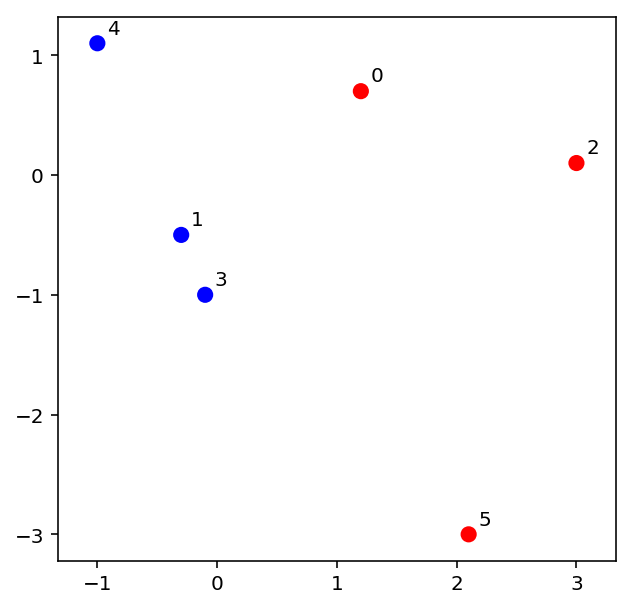

In [14]:
plot_data(data,labels)

This is a function to evaluate the accuracy of the training

In [15]:
def eval_accuracy(X,Y,A,B,C):
    num_correct = 0;
    data_len = data.shape[0]
    
    for i in range(data_len):
        X,Y = data[i]
        true_label = labels[i]
        
        output = A*X + B*Y + C
        predicted_label = 1 if output > 0 else -1
        
        if (predicted_label == true_label):
            num_correct += 1
    return num_correct / data_len

def create_meshgrid(data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return (xx,yy,np.ones(xx.shape))

def plot_learning_simple(grid,data,A,B,C,iteration, accuracy):
    xx,yy,Z = grid
    
    for i in range(xx.shape[0]): # row
        for j in range(yy.shape[1]): #column
            X, Y = xx[i][j],yy[i][j]
            output = A*X + B*Y + C
            output = 1 if output > 0 else -1
            Z[i][j] = output

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.title(f'accuracy at the iteration {iteration}: {accuracy}')
    ax.contourf(xx, yy, Z, cmap=plt.cm.binary, alpha=0.1, zorder=15)
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    ax.set_aspect('equal')
    nudge = 0.08
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

Here is the main algorithm.

In [16]:
def train_neural_network(data, labels, step_size, no_loops, iter_info):
    #A, B, and C are parameters of the function F. Here, they are set to 1, -2, -1
    A, B, C = 1, -2, -1
    # regularization strenght
    reg_strength = 0.2
    # this function is used for plotting, it can be ignored
    grid = create_meshgrid(data)
    
    # the main training loop
    for i in range(no_loops):
        # we randomly select the data point, and store its info into: x,y,label
        index = np.random.randint(data.shape[0])
        X,Y = data[index]
        label = labels[index]
        # we calculate the output of the function
        output = A*X + B*Y + C
        # We need to define how to affect parameters.
        # If the label is 1 but the output is smaller than 1, we want to push the score up.
        # If the label is -1 but the output is larger than -1, we want to push the score down.
        pull = 0.0
        if (label == 1 and output < 1):
            pull = 1.0
        if (label ==-1 and output > -1):
            pull = -1.0
        # here we update the values with the partial derivatives, and regularization.
        # partial derivative of dF/dA is X, dF/dB is Y, and of dF/dC is 1. 
        # regularization means to pull the parameters A, B, and C towards zero (in the oposite direction)
        A += step_size * (X * pull - A*reg_strength) # -A*reg_strength is from the regularization
        B += step_size * (Y * pull - B*reg_strength) # -A*reg_strength is from the regularization
        C += step_size * pull;
        
        # after a number of iterations, show training accuracy and plot it
        if (i%iter_info==0):
            accuracy = eval_accuracy(X,Y,A,B,C)
            plot_learning_simple(grid,data,A,B,C,i,accuracy)
    # the algorithm returns the learned parameters A, B, and C
    return (A,B,C)

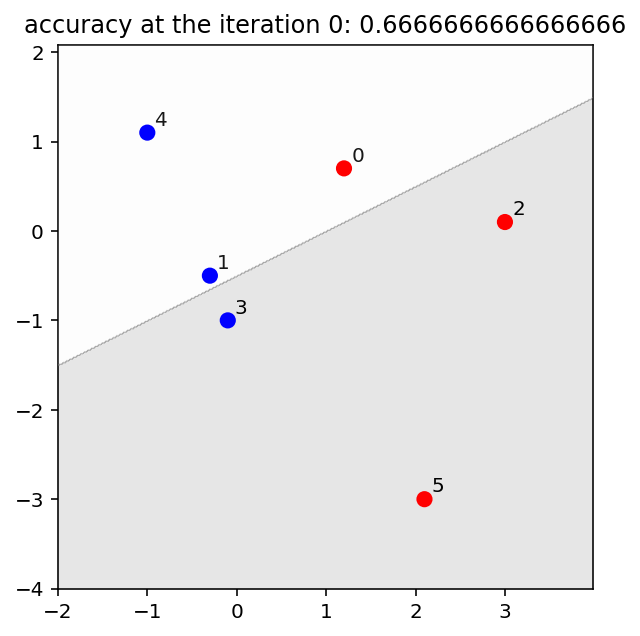

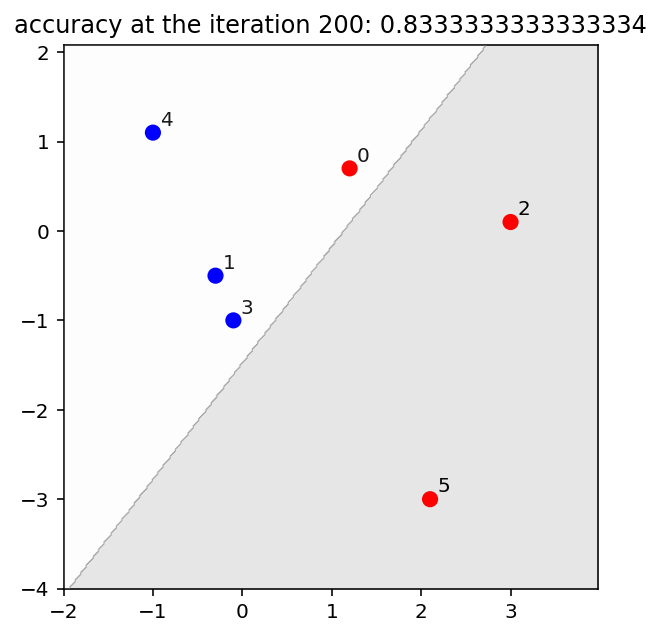

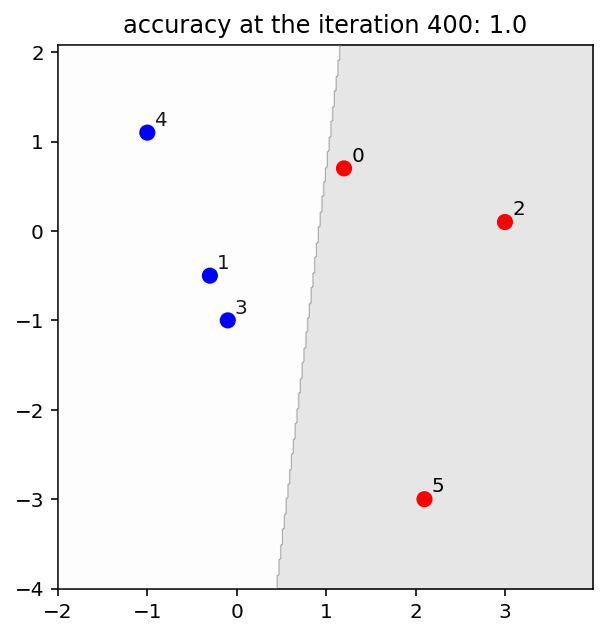

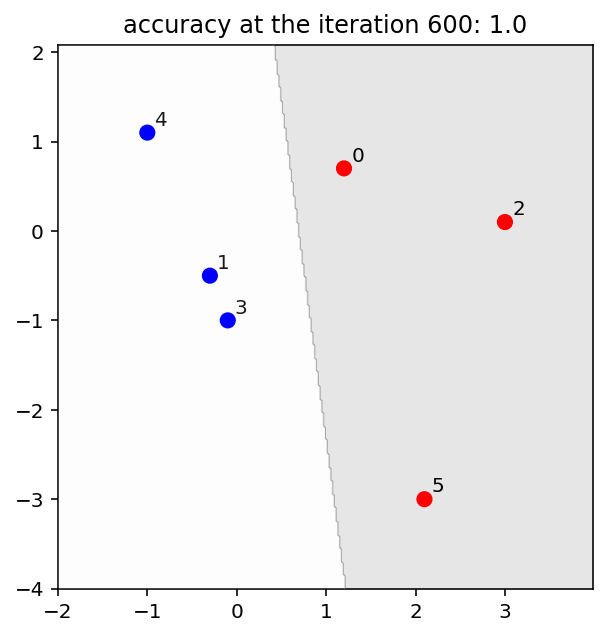

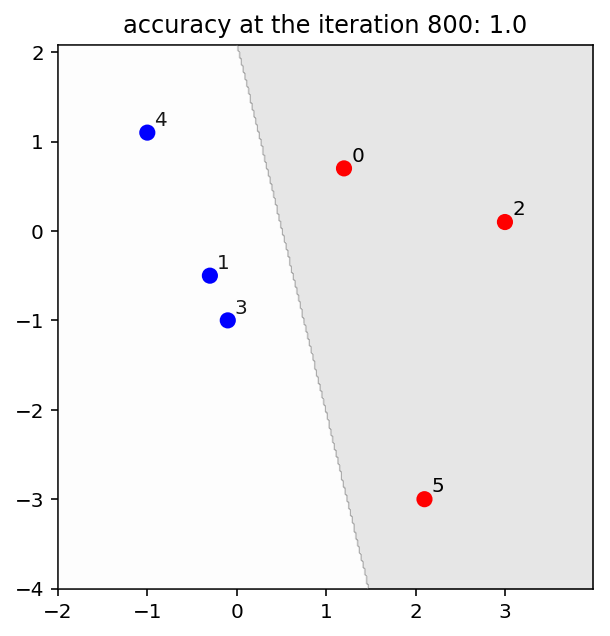

In [17]:
train_1 = train_neural_network(data, labels, 0.01, 1000, 200)

We can inspect the result by comparing the real label of a data point and the predicted label:

In [18]:
def show_prediction_SVM_simple(train, data, labels):
    a, b, c = train
    for i in range(data.shape[0]):
        x,y = data[i]
        label = labels[i]
        score = a*x + b*y + c
        score = 1 if score > 0 else -1
        print (f'data point {i}: real label : {label}, pred. label: {score}, {(score==label)}')

In [19]:
show_prediction_SVM_simple(train_1,data,labels)

data point 0: real label : 1, pred. label: 1, True
data point 1: real label : -1, pred. label: -1, True
data point 2: real label : 1, pred. label: 1, True
data point 3: real label : -1, pred. label: -1, True
data point 4: real label : -1, pred. label: -1, True
data point 5: real label : 1, pred. label: 1, True
